<a href="https://colab.research.google.com/github/AnaisGuillem/historicplacesmerced/blob/master/HistoricalPlacesMerced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Installing dependencies
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
#we also need opencv but is already installed in google colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8MB 26kB/s 
     |████████████████████████████████| 6.6MB 17.5MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101
1.5.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [3]:
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.2MB 739kB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post20200630-cp36-none-any.whl size=41299 sha256=409d3a3e0de3f61381e3a8c1ca83424f26bdd65489514b350aa8282060826de5
  Stored in directory: /root/.cache/pip/wheels/80/eb/49/83b9d20a804f1b4b163d1c1451c670a2067a00175662516f01
Successfully built fvcore


In [1]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

Detectron2 a pre-trained model

--2020-07-03 16:07:28--  https://ssl.cdn-redfin.com/photo/45/mbpaddedwide/548/genMid.MC18163548_0.jpg
Resolving ssl.cdn-redfin.com (ssl.cdn-redfin.com)... 93.184.220.20
Connecting to ssl.cdn-redfin.com (ssl.cdn-redfin.com)|93.184.220.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64883 (63K) [image/jpeg]
Saving to: ‘genMid.MC18163548_0.jpg.1’

genMid.MC18163548_0 100%[===================>]  63.36K  --.-KB/s    in 0.005s  

2020-07-03 16:07:28 (12.9 MB/s) - ‘genMid.MC18163548_0.jpg.1’ saved [64883/64883]

--2020-07-03 16:07:28--  http://input.jpg/
Resolving input.jpg (input.jpg)... failed: Name or service not known.
wget: unable to resolve host address ‘input.jpg’
FINISHED --2020-07-03 16:07:28--
Total wall clock time: 0.04s
Downloaded: 1 files, 63K in 0.005s (12.9 MB/s)


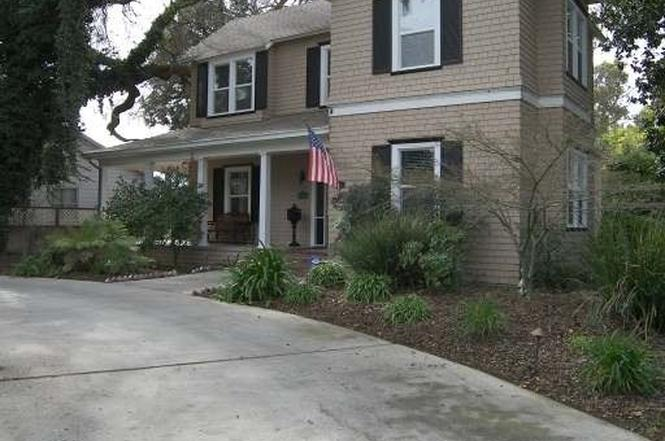

In [9]:
!wget https://ssl.cdn-redfin.com/photo/45/mbpaddedwide/548/genMid.MC18163548_0.jpg input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

model_final_cafdb1.pkl: 261MB [00:26, 10.0MB/s]                           


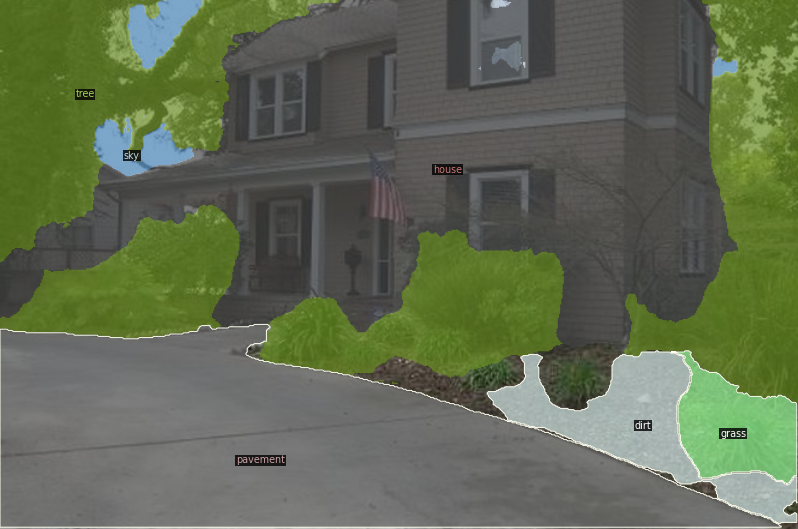

In [7]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(out.get_image()[:, :, ::-1])

segments_info variable describes the information of the segments 

In [ ]:
print(segments_info);

[{'id': 1, 'isthing': True, 'score': 0.9075378179550171, 'category_id': 62, 'instance_id': 0, 'area': 7688.0}, {'id': 2, 'isthing': False, 'category_id': 12, 'area': 113914.0}, {'id': 3, 'isthing': False, 'category_id': 37, 'area': 53381.0}, {'id': 4, 'isthing': False, 'category_id': 40, 'area': 10455.0}, {'id': 5, 'isthing': False, 'category_id': 44, 'area': 33476.0}, {'id': 6, 'isthing': False, 'category_id': 46, 'area': 74193.0}]
